<a href="https://colab.research.google.com/github/bsrthyle/ML-Course-Calabria-2020/blob/master/lab/Calabria_Day2_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 2: Code used during lecture and lab assignment

## Instructions

- The notebook combines 'code used during lecture' with the 'Day 1 lab' assignment (see further down)
- The lab assignment can be done largely by copying/paste/modification of the code used during the lecture
- Please add answers/discussion/comments to the notebook as comments or text box. Do not create another file in addition.
- When you are done with your assignment, save the notebook in drive and add your last name to the name of the file
- Upload your final notebook to https://uni-bonn.sciebo.de/s/sale9QkwtsIYwyn at the end of the day. The password for access is the same as before



## Code used during lecture

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn import tree



In [2]:
# Set the numpy random seed
np.random.seed(100)

**Stop Here** Before you run the next cell - the better way to load the data is through google drive.  You can follow the steps laid out on page 2 and 3 of this file: https://github.com/heckelei/Anania_AFEPA_summer_school/blob/master/How%20to%20import%20data%20in%20colab.pdf


In [ ]:
# Warning!  Do Not run this cell unless you absolutely have to!!
# Download data (if you haven't been able to load the data through google)
#!wget http://www.ilr.uni-bonn.de/agpo/courses/ml/brazil_all_data_v2.csv

In [3]:
# Run this cell in order to mount google drive 

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
# Load data with pandas into a dataframe

# Note: You might need to adjust the path here. Depending on where you have 
#       saved the data file in google drive

df = pd.read_csv('/content/drive/My Drive/colab/brazil_all_data_v2.csv')

In [5]:
# Define binary variable for deforestration in 2018
df['D_defor_2018'] = df['defor_2018']>0
Y_all = df['D_defor_2018']

In [6]:
# Define a list of features names (explantory variables)
lstX = [
  'wdpa_2017',
  'population_2015',
  'chirps_2017',
  'defor_2017',
  'maize',
  'soy',
  'sugarcane',
  'perc_treecover',
  'perm_water',
  'travel_min',
  'cropland',
  'mean_elev',
  'sd_elev',
  'near_road',
  'defor_2017_lag_1st_order',
  'wdpa_2017_lag_1st_order',
  'chirps_2017_lag_1st_order',
  'population_2015_lag_1st_order',
  'maize_lag_1st_order',
  'soy_lag_1st_order',
  'sugarcane_lag_1st_order',
  'perc_treecover_lag_1st_order',
  'perm_water_lag_1st_order',
  'travel_min_lag_1st_order',
  'cropland_lag_1st_order',
  'mean_elev_lag_1st_order',
  'sd_elev_lag_1st_order',
  'near_road_lag_1st_order',
 ]

# Get the explanatory Variables
X_all =  df.loc[:,lstX]

In [7]:
# Split the data into train and test data using sklearn train_test_split object
#   (see: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

#   Note: This randomly split the data in 80% train and 20% test data
X_train_raw, X_test_raw, Y_train, Y_test = train_test_split(X_all, Y_all, test_size = 0.2)

In [8]:
# Scale data to 0-1 range using sklearn MinMaxScalar object 
# (see: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) 
scaler = MinMaxScaler()
# Use only the train data to fit the MinMaxScalar 
scaler.fit(X_train_raw)

# Apply the MinMax transformation to the train and test data 
X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)
# Note the depended variable does not need to be scaled as it is a binary variable anyway

Run logit on deforestation binary variable

In [9]:
# Fit a logistic regression model using sklearn 
# (see: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

# Create the model object
modelLg = LogisticRegression(random_state=0,penalty='none',fit_intercept=True,max_iter=1000)
# Fit the model using the training data
modelLg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
# Define a function that prints the model statistics.
# We will use the function below to always get the same model stats for each of
# the model the we will estimate below.
def printOutput(mod,X_train,Y_train,X_test,Y_test):
  # view results
  print('Score in train', mod.score(X_train, Y_train))
  print('Score in test', mod.score(X_test, Y_test))

  Y_test_had_Tree = mod.predict(X_test)

  print('\nConfusion Matrix')
  print(pd.DataFrame(confusion_matrix(Y_test, Y_test_had_Tree),
            index=pd.MultiIndex.from_arrays([['actual','actual'], ['False','True']]),
            columns=pd.MultiIndex.from_arrays([['predicted','predicted'], ['False','True']])))

In [11]:
# Use the function to print the model statistics for our logit model 
printOutput(modelLg,X_train,Y_train,X_test,Y_test)

# Compute ROC curve and ROC area for each class

# Get the predicted probabiltities 
Y_score = modelLg.decision_function(X_test)

# Get true positive and false positive rate
# See: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
fpr_Lg, tpr_Lg, _ = roc_curve(Y_test, Y_score)

# Get the Area under the cureve (AUC)
# See: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html
roc_auc_Lg = auc(fpr_Lg, tpr_Lg)

print('\nROC AUC', roc_auc_Lg)

Score in train 0.7861236696807233
Score in test 0.7838081139473474

Confusion Matrix
             predicted      
                 False  True
actual False     36624  1315
       True       9492  2557

ROC AUC 0.765280059112499


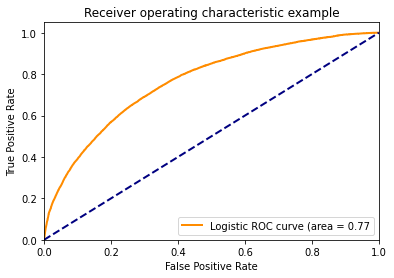

In [12]:
# Plot the ROC curve
plt.figure()
lw = 2
plt.plot(fpr_Lg, tpr_Lg, color='darkorange',
         lw=lw, label='Logistic ROC curve (area = %0.2f' % roc_auc_Lg)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Now run a decision tree using the same specification

In [13]:
# Fit a decision tree using sklearn
# (see https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

# Define a model object
modelTree = tree.DecisionTreeClassifier()
# Fit the model
modelTree = modelTree.fit(X_train, Y_train)

In [14]:
# Use the function to print the model statistics for our logit model 
printOutput(modelTree,X_train,Y_train,X_test,Y_test)

Score in train 1.0
Score in test 0.7643034328238777

Confusion Matrix
             predicted      
                 False  True
actual False     31990  5949
       True       5833  6216


Run the same model using  a random forest

In [15]:
# run a random forest using sklearn and default hyperparameters (note, this will take a few minutes)
# (see https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
from sklearn.ensemble import RandomForestClassifier

# Create model object
modelForest = RandomForestClassifier()
# Fit model
modelForest = modelForest.fit(X_train, Y_train)

In [16]:
# Print model output stats
printOutput(modelForest,X_train,Y_train,X_test,Y_test)


Score in train 0.9999749939985596
Score in test 0.8354605105225255

Confusion Matrix
             predicted      
                 False  True
actual False     35571  2368
       True       5857  6192


In [17]:
# ====================
# Discuss in the group
# ====================
# What do you conclude from the model outcome. Is this model a 
# useful model. Compare the results to the logit outcomes. 

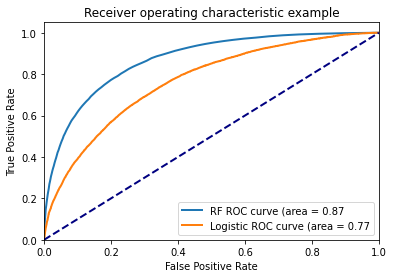

In [18]:
# Plot ROC curve 
# Get the predicted probabiltities 
Y_scoreRF = modelForest.predict_proba(X_test)[:,1]

# Get true positive and false positive rate
fpr_RF, tpr_RF, _ = roc_curve(Y_test, Y_scoreRF)

# Get the Area under the cureve (AUC)
roc_auc_RF = auc(fpr_RF, tpr_RF)


plt.figure()
lw = 2
plt.plot(fpr_RF, tpr_RF, 
         lw=lw, label='RF ROC curve (area = %0.2f' % roc_auc_RF)
plt.plot(fpr_Lg, tpr_Lg, 
         lw=lw, label='Logistic ROC curve (area = %0.2f' % roc_auc_Lg)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Visualizing the results

Feature ranking:
1. wdpa_2017 (0.153773)
2. population_2015 (0.076315)
3. chirps_2017 (0.050062)
4. defor_2017 (0.044067)
5. maize (0.037960)
6. soy (0.037260)
7. sugarcane (0.036292)
8. perc_treecover (0.036261)
9. perm_water (0.035162)
10. travel_min (0.034423)
11. cropland (0.033846)
12. mean_elev (0.033821)
13. sd_elev (0.033135)
14. near_road (0.031709)
15. defor_2017_lag_1st_order (0.031653)
16. wdpa_2017_lag_1st_order (0.030303)
17. chirps_2017_lag_1st_order (0.029846)
18. population_2015_lag_1st_order (0.029357)
19. maize_lag_1st_order (0.029184)
20. soy_lag_1st_order (0.028095)
21. sugarcane_lag_1st_order (0.025069)
22. perc_treecover_lag_1st_order (0.024183)
23. perm_water_lag_1st_order (0.023978)
24. travel_min_lag_1st_order (0.023328)
25. cropland_lag_1st_order (0.021272)
26. mean_elev_lag_1st_order (0.014762)
27. sd_elev_lag_1st_order (0.008199)
28. near_road_lag_1st_order (0.006685)


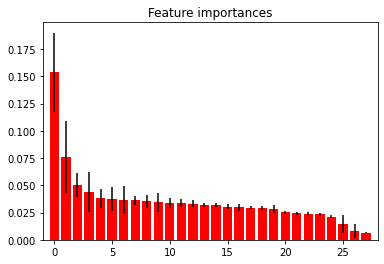

In [19]:
# Generate a feature importance graph for the forest
# Adjusted based on  https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

importances = modelForest.feature_importances_
std = np.std([tree.feature_importances_ for tree in modelForest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")


for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, lstX[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
# plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Lab 2a 

The first part of today's lab will have you predict deforestation using both a random forest and XGboost models

In [ ]:
# In the lecture part we have run a Random Forest that heavily 
# overfitted the training data. Adjust a hyperparamter 
# and see if you can train a model that does not overfit.

# Hint: Vary the parameter max_depth or min_samples_split

# Sklearn documentation on RF:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict_proba

# ==============
# Your code here
# ==============
modelForest = ...

# Fit model
...

#  Print model stats output
printOutput(...)

In [20]:
# In the lecture part we have run a Random Forest that heavily 
# overfitted the training data. Adjust a hyperparamter 
# and see if you can train a model that does not overfit.

# Hint: Vary the parameter max_depth or min_samples_split

# Sklearn documentation on RF:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict_proba

# ==============
# Your code here
# ==============

# =======================
# Solution: 
#
# Note: The hyperparamter values are justs
# examples and might not be the best!
#
# =======================

# Create model object
# modelForest = RandomForestClassifier(min_samples_split=50)
modelForest = RandomForestClassifier(max_depth=5)

# Fit model
modelForest = modelForest.fit(X_train, Y_train)

#  Print model stats output
printOutput(modelForest,X_train,Y_train,X_test,Y_test)

Score in train 0.8071437144914779
Score in test 0.8040929823157558

Confusion Matrix
             predicted      
                 False  True
actual False     36490  1449
       True       8344  3705


In [ ]:
# Now run an XGBoost model for the same task 
import xgboost as xgb

# Hint: 1) Look at one of the tutorial on XGB on how to specify and run the model
#          (e.g. https://hackernoon.com/want-a-complete-guide-for-xgboost-model-in-python-using-scikit-learn-sc11f31bq) 
#       2) You do not need to adjust hypterparamter here. The default paramters
#          should be fine here.

# ==============
# Your code here
# ==============
# Specify model 
model_xgb = ...


# Fit model to data
model_xgb ...


In [21]:
# Now run an XGBoost model for the same task 
import xgboost as xgb

# Hint: 1) Look at one of the tutorial on XGB on how to specify and run the model
#          (e.g. https://hackernoon.com/want-a-complete-guide-for-xgboost-model-in-python-using-scikit-learn-sc11f31bq) 
#       2) You do not need to adjust hypterparamter here. The default paramters
#          should be fine here.

# ==============
# Your code here
# ==============
# Specify model 
# model_xgb = ...


# Fit model to data
# model_xgb. ...
# =======================
# Solution: 
# =======================
# Specify model 
model_xgb = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

# Fit model to data
model_xgb.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# Print the model stats of you XGB model using the function from above
# ==============
# Your code here
# ==============
...



In [22]:
# Print the model stats of you XGB model using the function from above
# ==============
# Your code here
# ==============
# ...
# =======================
# Solution: 
# =======================
printOutput(model_xgb,X_train,Y_train,X_test,Y_test)

Score in train 0.8204469072577418
Score in test 0.819516684004161

Confusion Matrix
             predicted      
                 False  True
actual False     35349  2590
       True       6432  5617


In [23]:
# Compare to the outcome of the other model 
# (not need to change anything here) 
print('\n--- Logistic')
printOutput(modelLg,X_train,Y_train,X_test,Y_test)

print('\n--- Tree')
printOutput(modelTree,X_train,Y_train,X_test,Y_test)

print('\n--- Forest')
printOutput(modelForest,X_train,Y_train,X_test,Y_test)



--- Logistic
Score in train 0.7861236696807233
Score in test 0.7838081139473474

Confusion Matrix
             predicted      
                 False  True
actual False     36624  1315
       True       9492  2557

--- Tree
Score in train 1.0
Score in test 0.7643034328238777

Confusion Matrix
             predicted      
                 False  True
actual False     31990  5949
       True       5833  6216

--- Forest
Score in train 0.8071437144914779
Score in test 0.8040929823157558

Confusion Matrix
             predicted      
                 False  True
actual False     36490  1449
       True       8344  3705


In [ ]:
# Write a couple of sentences on what you see in your models, which you 
# believe are performing better and why
# ================
# Your answer here
# ================




In [ ]:
# Plot an ROC corve for the Logit, Random Forest and XGB model 

# Hint: Check what we have done above... 
# ==============
# Your code here
# ==============
# Get the predicted probabiltities 
Y_scoreXG = ...

# Get true positive and false positive rate
fpr_XG, tpr_XG, _ = ...

# Get the Area under the cureve (AUC)
roc_auc_XG = ...



In [24]:
# Plot an ROC corve for the Logit, Random Forest and XGB model 

# Hint: Check what we have done above... 
# ==============
# Your code here
# ==============
# Get the predicted probabiltities 
# Y_scoreXG = ...

# Get true positive and false positive rate
# fpr_XG, tpr_XG, _ = ...

# Get the Area under the cureve (AUC)
# roc_auc_XG = ...

# =======================
# Solution: 
# =======================
# Get the predicted probabiltities 
Y_scoreXG = model_xgb.predict_proba(X_test)[:,1]

# Get true positive and false positive rate
fpr_XG, tpr_XG, _ = roc_curve(Y_test, Y_scoreXG)

# Get the Area under the cureve (AUC)
roc_auc_XG = auc(fpr_XG, tpr_XG)


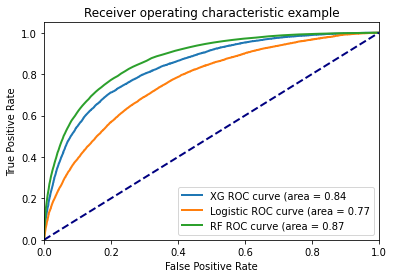

In [25]:
# Plot the figure (not need to change anything here)
plt.figure()
lw = 2

plt.plot(fpr_XG, tpr_XG, 
         lw=lw, label='XG ROC curve (area = %0.2f' % roc_auc_XG)

plt.plot(fpr_Lg, tpr_Lg, 
         lw=lw, label='Logistic ROC curve (area = %0.2f' % roc_auc_Lg)

plt.plot(fpr_RF, tpr_RF, 
         lw=lw, label='RF ROC curve (area = %0.2f' % roc_auc_RF)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# In one or two sentences, discuss what the ROC curves are telling you 
# ================
# Your answer here
# ================



# Lab 2b

The second part of the lab focus on SHAP values. First we show you how to plot SHAP values for the XG Boost model, which you have already seen in the lecutre. Then you are should create SHAP values for the logit model and explore how SHAP value would look like in a well known linear model. 


*More on SHAP values:* 

https://github.com/slundberg/shap

In [26]:
# First install the SHAP libary
!pip install shap

     |████████████████████████████████| 276kB 6.0MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394128 sha256=a5193dbc75f1de1cd73693bfb1ff24c1c3d31a99ff7b7537eba0d82a5fe72b2b
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


In [27]:
# Import the shape libary 
import shap
# Load JS visualization code to notebook
shap.initjs()

In [28]:
# Create a dataframe for our train data that includes the variable names
df_X_train = pd.DataFrame(X_train,columns=lstX)

# Explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model_xgb)

# Calculate the shape values using the TreeExplainer object
shap_values = explainer.shap_values(df_X_train)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


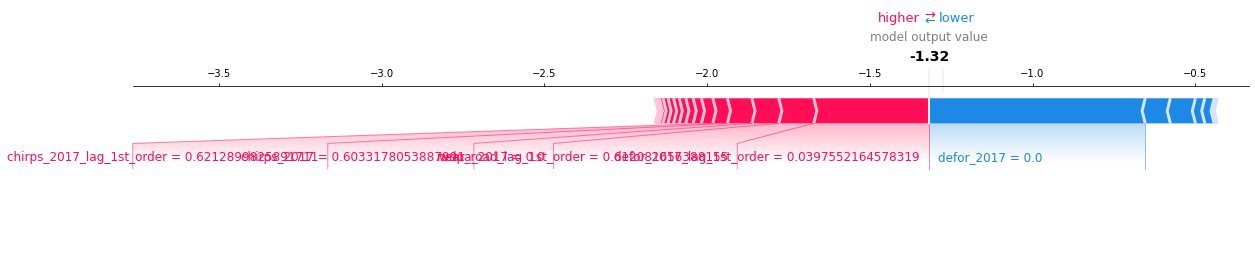

In [30]:
# visualize the first prediction's explanation
# shap.force_plot(explainer.expected_value, shap_values[0,:], df_X_train.iloc[0,:])

# If you have a javascript error use matplotlib=True to avoid Javascript
shap.force_plot(explainer.expected_value, shap_values[0,:], df_X_train.iloc[0,:],matplotlib=True)

# Note: This might look different than the version the slides because another random seed
#       was used to create the plots in the slides

In [ ]:
# ====================
# Discuss in the group
# ====================
# How do you interpret this plot?
# When might you want to use a plot like this?


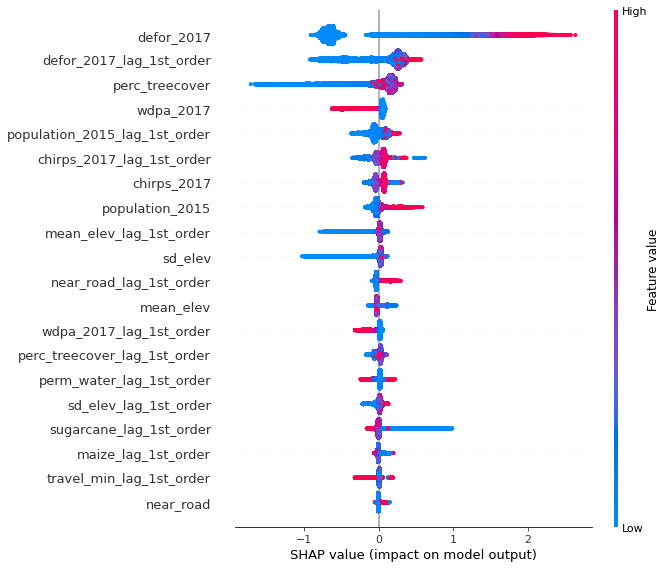

In [31]:
# summarize the effects of all the features
shap.summary_plot(shap_values, df_X_train)

In [ ]:
# ====================
# Discuss in the group
# ====================
# How do you interpret this plot?


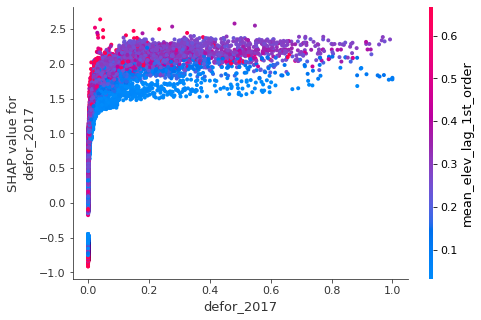

In [32]:
# create a dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("defor_2017", shap_values, df_X_train)

In [ ]:
# ====================
# Discuss in the group
# ====================
# How do you interpret this plot?

#### Now it is your turn... 
Try to create SHAP values for our logit model and check how SHAP values would look like in a linear case. 

In [ ]:
# ====================
# Discuss in the group
# ====================
# Before you start creating the plots, discuss in the group what kind of 
# results you expect for the linear model. Specifically, think about how the 
# last plot (the dependence_plot) would look in this case.

In [ ]:
# Here we use the shap.LinearExplainer() function instead of the
# shap.TreeExplainer(...) we used above
 
# You can have a look here for a reference:
# https://slundberg.github.io/shap/notebooks/linear_explainer/Sentiment%20Analysis%20with%20Logistic%20Regression.html

# ==============
# Your code here
# ==============
explainer = ...

shap_values = ...


In [33]:
# Here we use the shap.LinearExplainer() function instead of the
# shap.TreeExplainer(...) we used above
 
# You can have a look here for a reference:
# https://slundberg.github.io/shap/notebooks/linear_explainer/Sentiment%20Analysis%20with%20Logistic%20Regression.html

# ==============
# Your code here
# ==============
# explainer = ...

# shap_values = ...


# =======================
# Solution: 
# =======================
explainer = shap.LinearExplainer(modelLg, df_X_train, feature_perturbation="interventional")

shap_values = explainer.shap_values(df_X_train)

In [ ]:
# Now create a dependence plot to show the effect of a single feature 
# across the whole dataset, as was done above but now for the logit model

# ==============
# Your code here
# ==============
 ...



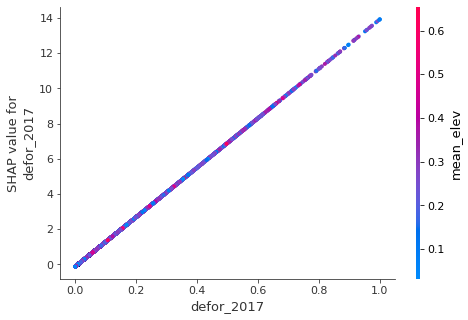

In [34]:
# Now create a dependence plot to show the effect of a single feature 
# across the whole dataset, as was done above but now for the logit model

# ==============
# Your code here
# ==============
#  ...


# =======================
# Solution: 
# =======================
shap.dependence_plot("defor_2017", shap_values, df_X_train)

In [ ]:
# ====================
# Discuss in the group
# ====================


# 1) Does this look like to what you expected?

# 2) How does this compare to the plot for the XGB model. What can you conclude?

# Note: Below you find the usual regression output for logit model again. This 
#       might be interesting as a reference.

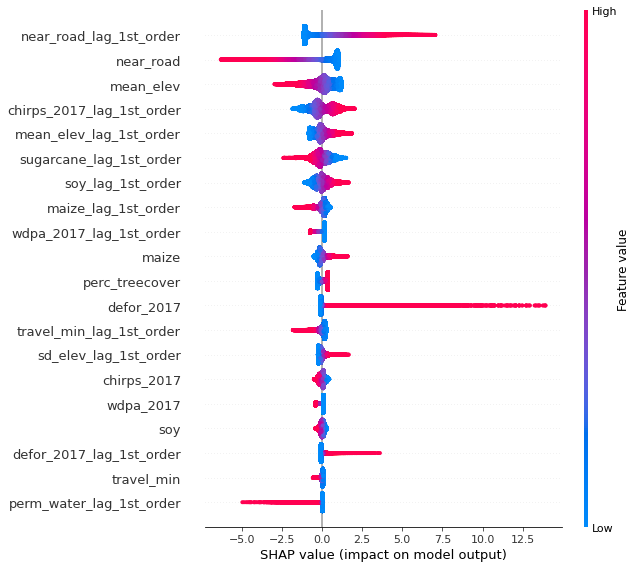

In [35]:
# Have a look at the SHAP summary plot
shap.summary_plot(shap_values, df_X_train)


### For your reference 

Lets create our usual regression output for the logit model as a reference

This used the same code from the lab intro session.

(Not need to change/do anything here)

In [38]:

from scipy.stats import norm
# Function to calculate pvalues and standard errors for a scikit-learn logisticRegression
# Source: https://stackoverflow.com/questions/25122999/scikit-learn-how-to-check-coefficients-significance
def logit_pvalue(model, x):
    """ Calculate z-scores for scikit-learn LogisticRegression.
    parameters:
        model: fitted sklearn.linear_model.LogisticRegression with intercept and large C
        x:     matrix on which the model was fit
    This function uses asymtptics for maximum likelihood estimates.
    """
    p = model.predict_proba(x)
    n = len(p)
    m = len(model.coef_[0]) + 1
    # m = len(model.coef_[0])
    # coefs = model.coef_[0]
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    ans = np.zeros((m, m))
    for i in range(n):
        ans = ans + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i, 0]
    vcov = np.linalg.inv(np.matrix(ans))
    se = np.sqrt(np.diag(vcov))
    t =  coefs/se  
    p = (1 - norm.cdf(abs(t))) * 2
    return se, p

In [39]:
# Use the previously created function to create a regression output table
se, p = logit_pvalue(modelLg, X_train)
coefs = np.concatenate([modelLg.intercept_, modelLg.coef_[0]]).T
resCoef = pd.DataFrame(coefs,index=['constant']+lstX)
resCoef.columns = ['coef']
resCoef['se'] = se
resCoef['pval'] = p
resCoef

,coef,se,pval
constant,-1.926006,0.034336,0.000000e+00
wdpa_2017,-0.480311,0.064108,6.772360e-14
population_2015,-0.349163,0.590274,5.541666e-01
chirps_2017,-0.950195,0.690518,1.688028e-01
defor_2017,14.027684,0.285865,0.000000e+00
maize,2.109900,0.771700,6.255271e-03
soy,-0.737853,0.576390,2.005001e-01
sugarcane,0.031563,0.507468,9.504061e-01
perc_treecover,0.642838,0.032833,0.000000e+00
perm_water,0.637694,0.262673,1.519444e-02


### Optional Tasks

(Optional) Explore the Shapley Value Explanations for different sub-sets of the data (e.g. protected areas versus others) and in a few sentences, discuss your findings

(Optional) Generate your model's prediction errors and explore them - comparing different subsets of your data (e.g. protected areas vs others)